# PXD022545
## Proteomic analysis of ARPE-19 cells exposed to chronic H2O2 treatment
[PRIDE link](https://www.ebi.ac.uk/pride/archive/projects/PXD022545)

[Article link](https://www.mdpi.com/2076-3921/10/1/25)

In [1]:
#Import libraries
os.chdir("/home/robbe/ionbot/")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import re
import numpy as np
import os
from pathlib import Path
from pyteomics import mass as pymass
import OxiAnalysis as OA
import importlib
importlib.reload(OA)
import warnings; warnings.simplefilter('ignore')

# Analysis without quant data

In [6]:
#first = pd.read_csv("/home/robbe/ionbot/full_projects/PXD022545_first.csv", index_col=0)
first = pd.read_csv("/home/robbe/ionbot/full_projects_/PXD022545/PXD022545_first.csv")
del first["Unnamed: 0"]
# del first["Unnamed: 0.1"]
del first["spectrum_title"]
del first["scan"]
first['modifications'] = first['modifications'].fillna("None")
first['Oxidant treatment'] = first['Oxidant treatment'].fillna("None")
first['Secondary treatment'] = first['Secondary treatment'].fillna("None")
first['Length of Secondary treatment (mins)'] = first['Length of Secondary treatment (mins)'].fillna(0)
first['Length of oxidant treatment (mins)'] = first['Length of oxidant treatment (mins)'].replace('0', 0)

In [7]:
first.head()

,ionbot_match_id,spectrum_file,precursor_mass,peptide_mass,observed_retention_time,charge,database_peptide,matched_peptide,modifications,modifications_delta,...,Organism,Cell line,Oxidant treatment,Oxidant dose (µM),Secondary treatment,Secondary treatment dose (µM),Length of oxidant treatment (mins),Length of Secondary treatment (mins),Notes,First/Lower/Coeluting
0,0_8_1,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,790.34769,790.34568,0.88133,2,EAADTER,EAADTER,None,0|,...,Human,ARPE-19,None,0,None,0,0,0,NaN,First
1,0_7572_1,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,1911.78352,1911.78054,1163.81700,4,SEEAHAEDSVMDHHFR,SEEAHAEDSVMDHHFR,11|[35]oxidation[M],11|15.9949,...,Human,ARPE-19,None,0,None,0,0,0,NaN,First
2,0_7573_4,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,762.36667,762.36603,1163.86404,2,GTFPDAR,GTFPDAR,None,0|,...,Human,ARPE-19,None,0,None,0,0,0,NaN,First
3,0_7574_2,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,939.45005,939.44836,1163.91264,2,VMEYINR,VMEYINR,2|[35]oxidation[M],2|15.9949,...,Human,ARPE-19,None,0,None,0,0,0,NaN,First
4,0_7575_1,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,895.40507,895.40354,1164.25452,2,ESFDGSVR,ESFDGSVR,None,0|,...,Human,ARPE-19,None,0,None,0,0,0,NaN,First


In [8]:
print("The amount of PSMs in this project dataset is: ", first.shape[0])
print("The amount of raw files that make up the master dataset is: ", len(first["spectrum_file"].unique()))

The amount of PSMs in this project dataset is:  115786
The amount of raw files that make up the master dataset is:  6


In [32]:
os.chdir("/home/robbe/ionbot")

In [9]:
first['Peptidoform_name'] = first.apply(lambda row: OA.peptidoform_name(row), axis=1)
first['Position'] = first['modifications'].apply(OA.get_positions)
first['Modification'] = first['modifications'].apply(OA.get_modification)
first['Oxidatively_modified'] = first['modifications'].apply(OA.oxidatively_modified)

## Overview of the treatments in this project

In [10]:
first.groupby(["Oxidant treatment", "Oxidant dose (µM)", "Length of oxidant treatment (mins)", "Secondary treatment", "Secondary treatment dose (µM)", 'Length of Secondary treatment (mins)'])["ionbot_match_id"].count().to_frame().reset_index()

,Oxidant treatment,Oxidant dose (µM),Length of oxidant treatment (mins),Secondary treatment,Secondary treatment dose (µM),Length of Secondary treatment (mins),ionbot_match_id
0,H2O2,10,4320,None,0,0,40070
1,None,0,0,None,0,0,75716


## Comparison between the treatments


In [11]:
H2O2 = first.loc[lambda first: first["Oxidant treatment"] == "H2O2"]
Control = first.loc[lambda first: first["Oxidant treatment"] == "None"]
print("There are this many replicates of each treatment: {}".format(H2O2["spectrum_file"].nunique()))
print("The H2O2 treatment contains this many PSMs: {}".format(H2O2.shape[0]))
print("The Control treatment contains this many PSMs: {}".format(Control.shape[0]))

There are this many replicates of each treatment: 3
The H2O2 treatment contains this many PSMs: 40070
The Control treatment contains this many PSMs: 75716


In [12]:
H2O2rep = OA.replicate_filter(H2O2, 2)
Controlrep = OA.replicate_filter(Control, 2)

### Oxidatively modified PSMs

In [13]:
print("The ratio of PSMs that contain an oxidative modification in the H2O2 treatment subset: {}".format((H2O2rep['Oxidatively_modified'].value_counts(normalize=True).mul(100).astype(str)+' %')[1]))
print("The ratio of PSMs that contain an oxidative modification in the Control treatment subset: {}".format((Controlrep['Oxidatively_modified'].value_counts(normalize=True).mul(100).astype(str)+' %')[1]))

The ratio of PSMs that contain an oxidative modification in the H2O2 treatment subset: 19.191371222516516 %
The ratio of PSMs that contain an oxidative modification in the Control treatment subset: 20.530778945987173 %


There is barely any difference between the ratio of oxidized PSMs between the treatment and control set-ups.

In [18]:
mrH2O2rep = OA.modratios(H2O2rep)
mrControlrep = OA.modratios(Controlrep)

In [19]:
modr = pd.merge(mrH2O2rep,mrControlrep, on="Modification", suffixes=('_H2O2', '_Control'))
modr["Difference"] = modr["Ratios_H2O2"] - modr["Ratios_Control"]
modr = modr.drop(modr[(modr["Ratios_H2O2"] == 0) & (modr["Ratios_Control"] == 0)].index)
modr


,Modification,Ratios_H2O2,Ratios_Control,Difference
0,[6]Carboxymethyl[K],0.000833,0.000748,0.000085
1,[35]Oxidation[T],0.000832,0.000635,0.000197
2,[35]Oxidation[E],0.000992,0.000784,0.000207
3,[35]Oxidation[S],0.000630,0.000519,0.000111
4,[35]Oxidation[Q],0.000378,0.000876,-0.000498
6,[35]Oxidation[I],0.001203,0.001418,-0.000215
8,[35]Oxidation[W],0.006895,0.007287,-0.000392
10,[35]Oxidation[H],0.000382,0.000230,0.000152
11,[35]Oxidation[V],0.000472,0.000300,0.000172
12,[35]Oxidation[R],0.000696,0.000644,0.000052


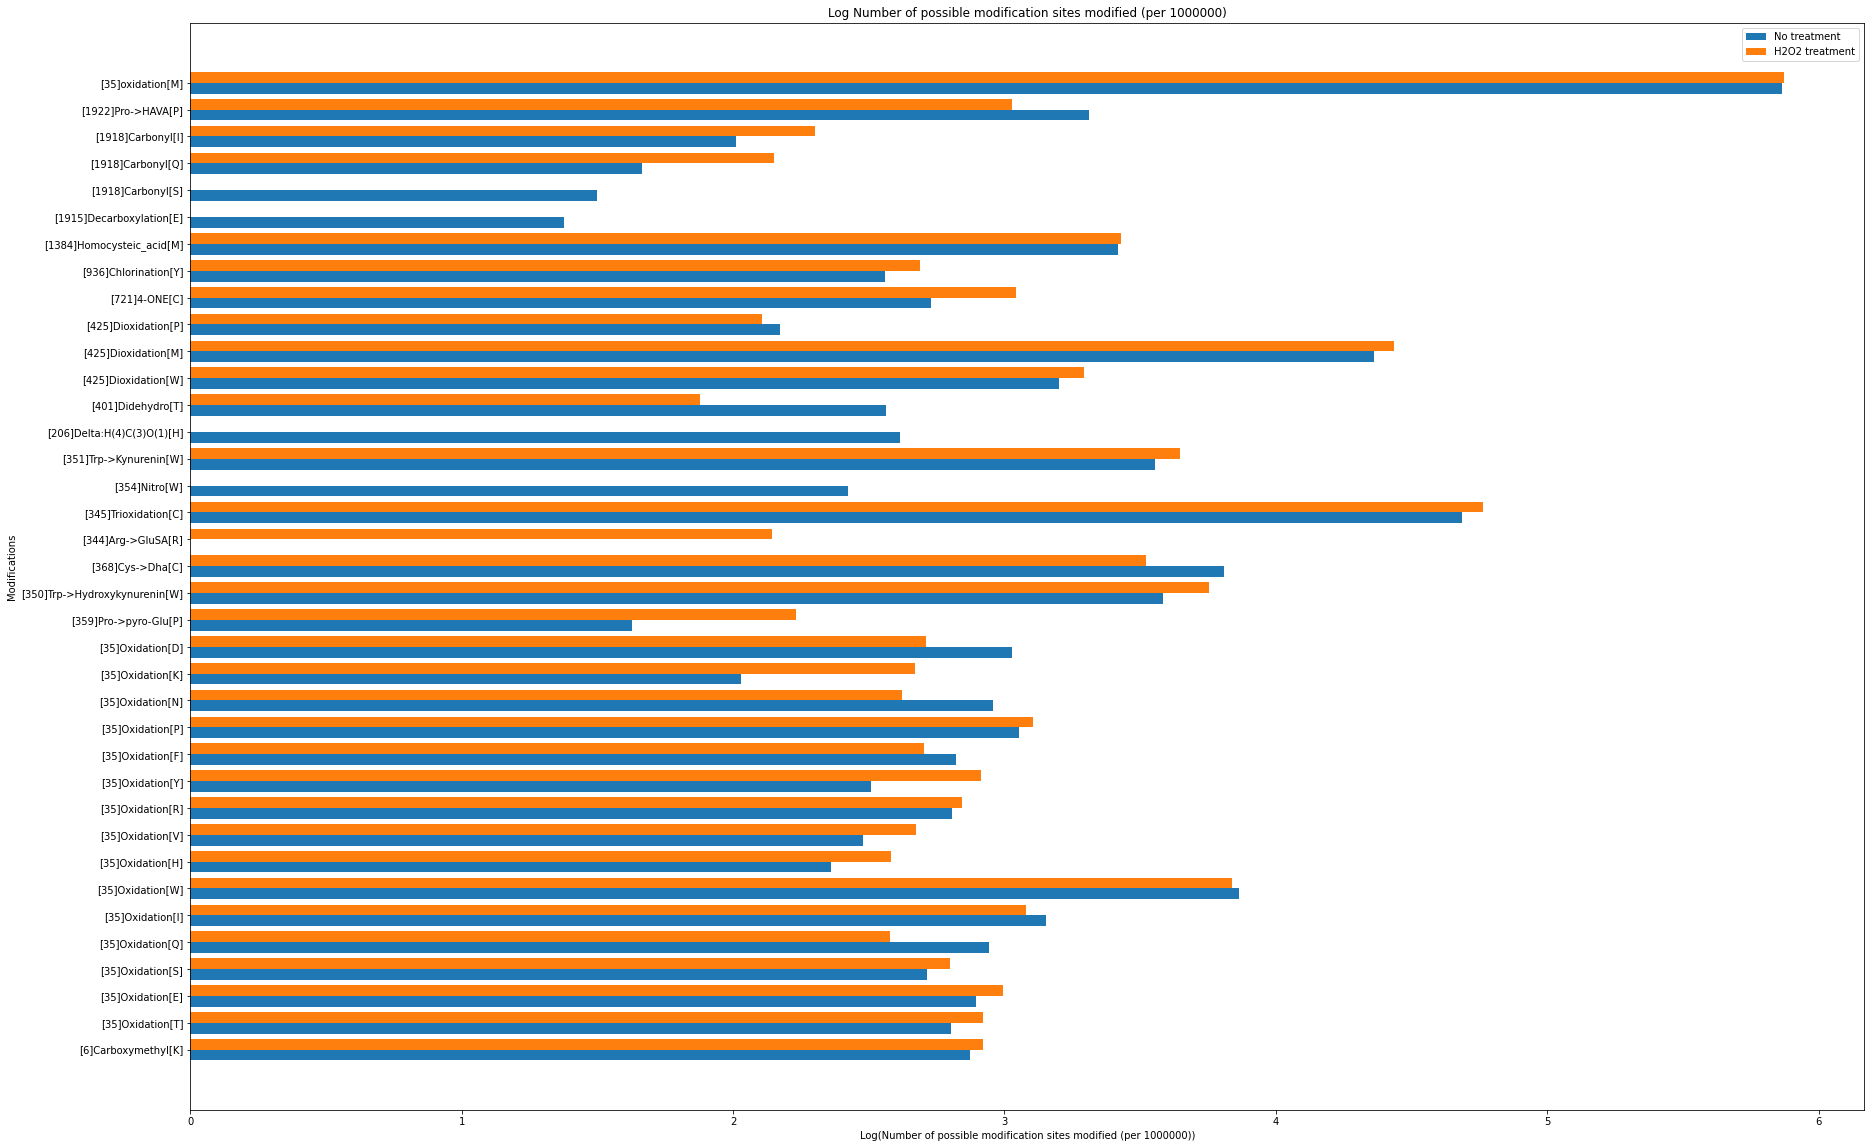

In [20]:
y = modr["Modification"]
xnone = np.log10(modr['Ratios_Control']*1000000)
xH = np.log10(modr['Ratios_H2O2']*1000000)
y_axis = np.arange(len(y))

plt.figure(figsize=(30,20))
plt.barh(y_axis - 0.2, xnone, 0.4, label = 'No treatment')
plt.barh(y_axis + 0.2, xH, 0.4, label = 'H2O2 treatment')

plt.yticks(y_axis, y)
plt.ylabel("Modifications")
plt.xlabel("Log(Number of possible modification sites modified (per 1000000))")
plt.title("Log Number of possible modification sites modified (per 1000000)")

plt.legend()
plt.show()

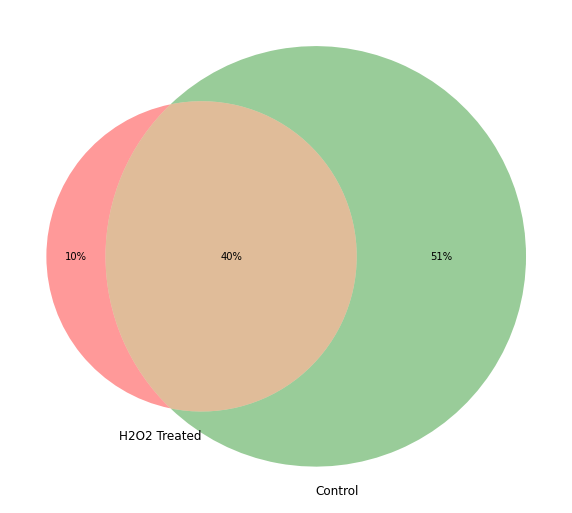

In [21]:
OA.condition_venn([H2O2rep, Controlrep], ["H2O2 Treated", "Control"])

In [22]:
difflist, pf_only_treatment = OA.comparelist(H2O2rep,Controlrep)
pf_only_treatment

,ionbot_match_id,spectrum_file,precursor_mass,peptide_mass,observed_retention_time,charge,database_peptide,matched_peptide,modifications,modifications_delta,...,Secondary treatment,Secondary treatment dose (µM),Length of oxidant treatment (mins),Length of Secondary treatment (mins),Notes,First/Lower/Coeluting,Peptidoform_name,Position,Modification,Oxidatively_modified
75733,0_7402_4,2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O...,946.45188,946.45083,1258.52490,2,VTEQEWR,VTEQEWR,None,0|,...,None,0,4320,0,NaN,First,VTEQEWR,None,None,False
75741,0_7453_1,2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O...,1130.59411,1130.59312,1264.48866,3,VRVELSNGEK,VRVELSNGEK,7|[7]Deamidated[N],7|0.9840,...,None,0,4320,0,NaN,First,VRVELSN[7]DeamidatedGEK,7,[7]Deamidated[N],False
75751,0_7493_1,2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O...,1045.50596,1045.50396,1269.82716,2,SLAAEEEAAR,SLAAEEEAAR,None,0|,...,None,0,4320,0,NaN,First,SLAAEEEAAR,None,None,False
75755,0_7509_1,2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O...,922.40751,922.40656,1272.02028,2,LMEDLDR,LMEDLDR,2|[425]Dioxidation[M],2|31.9898,...,None,0,4320,0,NaN,First,LM[425]DioxidationEDLDR,2,[425]Dioxidation[M],True
75761,0_7530_4,2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O...,830.45029,830.44976,1276.33254,2,ELALGSNK,ELALGSNK,None,0|,...,None,0,4320,0,NaN,First,ELALGSNK,None,None,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115747,0_7233_1,2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O...,1016.51189,1016.51130,1192.38438,3,MHNIPVYK,MHNIPVYK,1|[35]oxidation[M],1|15.9949,...,None,0,4320,0,NaN,First,M[35]oxidationHNIPVYK,1,[35]oxidation[M],True
115763,0_7323_1,2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O...,838.37180,838.37080,1203.97002,2,EDGDGLK,EDYDGLK,3|Gly->Tyr[G],0|,...,None,0,4320,0,NaN,First,EDYGly->TyrDGLK,3,Gly->Tyr[G],False
115764,0_7326_2,2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O...,984.50437,984.50287,1204.41288,2,SPFEQHIK,SPFEQHIK,None,0|,...,None,0,4320,0,NaN,First,SPFEQHIK,None,None,False
115772,0_7354_3,2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O...,827.43961,827.43886,1208.85330,2,ATLPSPDK,ATLPSPDK,None,0|,...,None,0,4320,0,NaN,First,ATLPSPDK,None,None,False


In [43]:
onlytreatment = OA.modcounts(pf_only_treatment)
onlytreatment = onlytreatment.sort_values("Counts", ascending=False).drop(onlytreatment[onlytreatment["Counts"] == 0].index, axis=0)

In [44]:
onlytreatment

,Modification,Counts
129,[35]oxidation[M],655
80,[425]Dioxidation[M],40
33,[345]Trioxidation[C],36
7,[35]Oxidation[G],15
121,[1922]Pro->HAVA[P],14
1,[35]Oxidation[E],14
5,[35]Oxidation[I],12
2,[35]Oxidation[S],10
16,[35]Oxidation[P],10
11,[35]Oxidation[V],9


In [23]:
RPMH2O2 = OA.relative_PSM_modification(H2O2rep)
RPMControl = OA.relative_PSM_modification(Controlrep)

In [24]:
RPM = pd.merge(RPMH2O2,RPMControl, on="Amino acid", suffixes=('_H2O2', '_Control'))
RPM

,Amino acid,Relative level of PSMs containing unmodified residue_H2O2,Relative level of PSMs containing unmodified residue_Control
0,A,0.998391,0.998686
1,R,0.997279,0.998345
2,N,0.959219,0.959986
3,D,0.991436,0.986568
4,C,0.344975,0.337216
5,Q,0.988226,0.985301
6,E,0.988044,0.986653
7,G,0.998584,0.998123
8,H,0.994805,0.995784
9,I,0.997818,0.998056


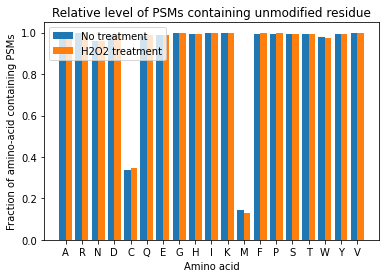

In [25]:
x = RPM["Amino acid"]
xnone = RPM["Relative level of PSMs containing unmodified residue_Control"]
xH = RPM['Relative level of PSMs containing unmodified residue_H2O2']
x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, xnone, 0.4, label = 'No treatment')
plt.bar(x_axis + 0.2, xH, 0.4, label = 'H2O2 treatment')

plt.xticks(x_axis, x)
plt.xlabel("Amino acid")
plt.ylabel("Fraction of amino-acid containing PSMs")
plt.title("Relative level of PSMs containing unmodified residue")
plt.rcParams["figure.figsize"] = (8,8)
plt.legend()
plt.show()

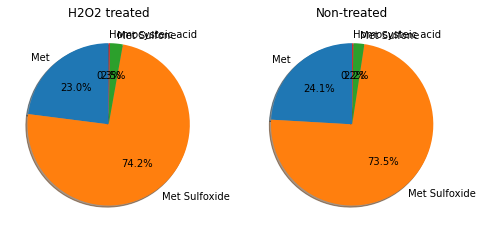

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2)
OA.methionine_overview(H2O2rep, ax1)
OA.methionine_overview(Controlrep, ax2)
plt.title("Methionine containing peptides")
ax1.set_title("H2O2 treated")
ax2.set_title("Non-treated")
plt.show()

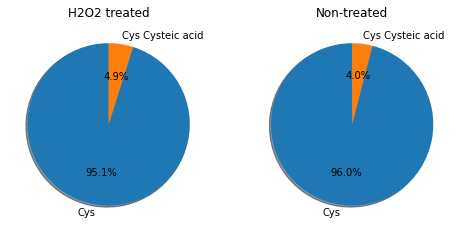

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2)
OA.cysteine_overview(H2O2rep, ax1)
OA.cysteine_overview(Controlrep, ax2)
plt.title("cysteine containing peptides")
ax1.set_title("H2O2 treated")
ax2.set_title("Non-treated")
plt.show()

In [28]:
os.chdir("/home/robbe/ionbot/differentially_oxidized_psms")

In [27]:
diffox, statement = OA.differentially_oxidized_psms(H2O2rep,Controlrep)
with open("diffoxPXD022545.txt", "w") as f:
    for i in diffox:
        f.write(i)
        f.write("\n")
f.close()

# Analysis with quant data

In [2]:
#quant = pd.read_csv("/home/robbe/ionbot/PXD022545/raw_files/QuantifiedPeptides.tsv", "\t") 
quant = pd.read_csv("/home/robbe/ionbot/ionbot_0.9.5/PXD022545/mzml_files/QuantifiedPeptides.tsv", "\t")
quant.drop(list(quant.filter(regex = 'Detection Type')), axis = 1, inplace = True)

In [4]:
cols = ['Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_01_20200717061234',
       'Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_02_20200717083719',
       'Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_03_20200717110239',
       'Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_01',
       'Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_02',
       'Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_03']

In [5]:
OA.quantile_transform(quant,cols)

,Sequence,Base Sequence,Protein Groups,Gene Names,Organism,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_01_20200717061234,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_02_20200717083719,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_03_20200717110239,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_01,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_02,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_03,Unnamed: 17
0,AAAAAAAAAVSRnan,AAAAAAAAAVSR,ZFP91_HUMAN,NaN,NaN,3.740595,3.598344,NaN,NaN,NaN,NaN,NaN
1,AAAAAAAGDSDSWDADAFSVEDPVRK12|[5]Carbamyl[S],AAAAAAAGDSDSWDADAFSVEDPVRK,EIF3J_HUMAN,NaN,NaN,3.723749,NaN,3.576714,3.944165,4.111965,3.891135,NaN
2,AAAAAAALQAKnan,AAAAAAALQAK,RL4_HUMAN,NaN,NaN,6.375439,6.044869,6.736737,6.285343,6.014918,6.635242,NaN
3,AAAAADGPPAADGEDGQDPHSK4|semi_tryptic,AAAAADGPPAADGEDGQDPHSK,TXND5_HUMAN,NaN,NaN,4.128794,4.581340,3.772819,4.168019,3.019854,3.029497,NaN
4,AAAAADLANRnan,AAAAADLANR,NaN,NaN,NaN,3.878141,4.508245,4.170794,4.567799,4.356829,4.339505,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
34439,YYTVFDRDNNRnan,YYTVFDRDNNR,CATD_HUMAN,NaN,NaN,NaN,5.404300,2.890858,6.041208,6.183599,6.076473,NaN
34440,YYTVFDRnan,YYTVFDR,CATD_HUMAN,NaN,NaN,6.515225,6.691287,6.657141,6.778519,6.628037,6.704846,NaN
34441,YYVTIIDAPGHRDFIKnan,YYVTIIDAPGHRDFIK,NaN,NaN,NaN,5.279995,5.535589,5.930679,4.855595,2.695792,5.796090,NaN
34442,YYVTIIDAPGHRnan,YYVTIIDAPGHR,NaN,NaN,NaN,6.745909,6.832146,7.084362,6.632395,6.365648,7.128726,NaN


In [6]:
Nonmodified = quant.loc[quant["Sequence"].str.endswith("nan") & quant["Base Sequence"].str.contains("M")]
Sulfoxide = quant.loc[quant["Sequence"].str.contains("[35]oxidation[M]",regex=False)]
Sulfone = quant.loc[quant["Sequence"].str.contains("[425]Dioxidation[M]", regex = False)]
Nonmodifiednums = Nonmodified.append(Nonmodified.sum(numeric_only=True), ignore_index=True)[-1:]
Sulfoxidenums = Sulfoxide.append(Sulfoxide.sum(numeric_only=True), ignore_index=True)[-1:]
Sulfonenums = Sulfone.append(Sulfone.sum(numeric_only=True), ignore_index=True)[-1:]
moddf = [Nonmodifiednums, Sulfoxidenums, Sulfonenums]

In [7]:
Controldict = {}
Treatmentdict = {}
sizesC = []
sizesT = []
for i in moddf:
    name = 0
    df = i.filter(regex=r'(H2O2|CTRL)')
    dfmeds = df.groupby(df.columns.str.extract(pat=r'(H2O2|CTRL)', expand=False),axis=1).median().add_prefix('med_')
    
    Controlsub = dfmeds.loc[:, dfmeds.columns.str.contains("CTRL")]
    Treatmentsub = dfmeds.loc[:, dfmeds.columns.str.contains("H2O2")]
    Treatmentsum = Treatmentsub.sum(axis=1).values[0]
    Controlsum = Controlsub.sum(axis=1).values[0]

    sizesC.append(Controlsum)
    sizesT.append(Treatmentsum)

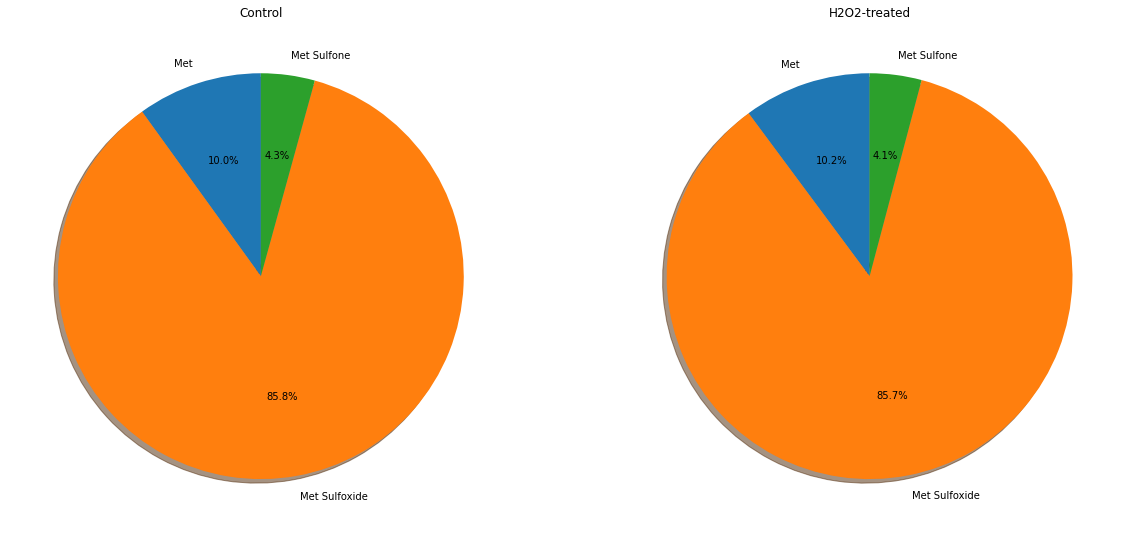

In [8]:
labels = ["Met", "Met Sulfoxide", "Met Sulfone"]

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.pie(sizesC, labels=labels, autopct='%1.1f%%', shadow= True, startangle = 90)
ax2.pie(sizesT, labels=labels, autopct='%1.1f%%', shadow= True, startangle= 90)
plt.title("Methionine containing peptides")
ax1.set_title("Control")
ax2.set_title("H2O2-treated")
fig.set_size_inches(20,40)
plt.show()

In [8]:
NonmodifiedC = quant.loc[quant["Sequence"].str.endswith("nan") & quant["Base Sequence"].str.contains("C")]
Sulfenic = quant.loc[quant["Sequence"].str.contains("[35]oxidation[C]",regex=False)]
Sulfinic = quant.loc[quant["Sequence"].str.contains("[425]Dioxidation[C]", regex = False)]
Cysteic = quant.loc[quant["Sequence"].str.contains("[345]Trioxidation[C]", regex = False)]
Non_modified = NonmodifiedC.append(NonmodifiedC.sum(numeric_only=True), ignore_index=True)[-1:]
Sulfenic_acid = Sulfenic.append(Sulfenic.sum(numeric_only=True), ignore_index=True)[-1:]
Sulfinic_acid = Sulfinic.append(Sulfinic.sum(numeric_only=True), ignore_index=True)[-1:]
Cysteic_acid = Cysteic.append(Cysteic.sum(numeric_only=True), ignore_index=True)[-1:]
moddfc = [Non_modified, Sulfenic_acid, Sulfinic_acid, Cysteic_acid]

In [9]:
Controldict = {}
Treatmentdict = {}
for i in moddfc:
    name = OA.retrieve_name(i)[1]
    df = i.filter(regex=r'(H2O2|CTRL)')
    Controlsub = df.loc[:, df.columns.str.contains("CTRL")]
    Treatmentsub = df.loc[:, df.columns.str.contains("H2O2")]
    Controlsum = Controlsub.sum(axis=1)
    Treatmentsum = Treatmentsub.sum(axis=1)
    Controldict[name] = Controlsum.values[0]
    Treatmentdict[name] = Treatmentsum.values[0]


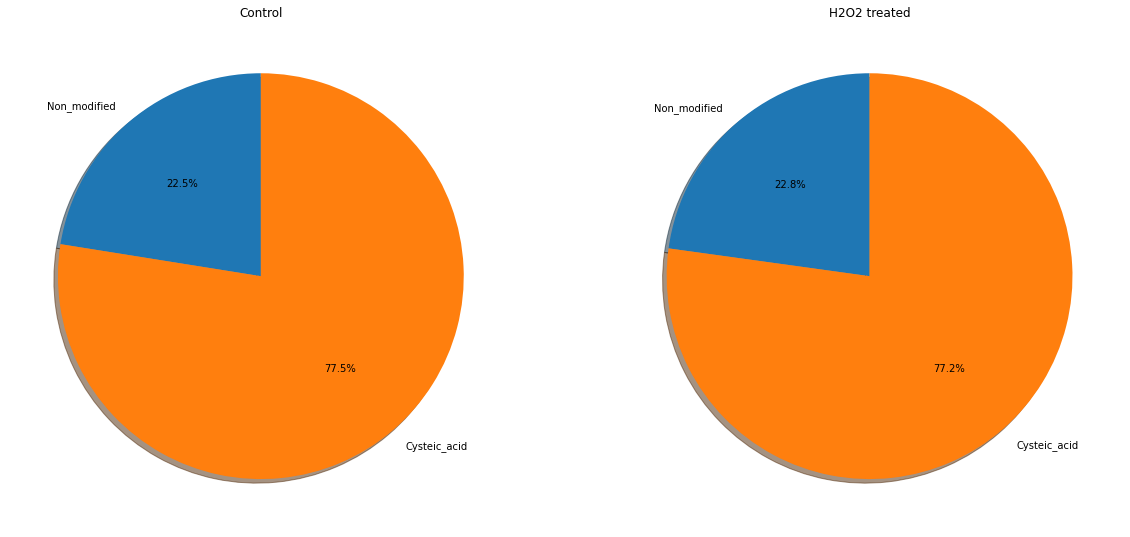

In [10]:
labelsC = []
labelsT = []

sizesC = []
sizesT = []


for x, y in Controldict.items():
    if y != 0:
        labelsC.append(x)
        sizesC.append(y)
for x, y in Treatmentdict.items():
    if y != 0:
        labelsT.append(x)
        sizesT.append(y)


fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.pie(sizesC, labels=labelsC, autopct='%1.1f%%', shadow= True, startangle = 90)
ax2.pie(sizesT, labels=labelsT, autopct='%1.1f%%', shadow= True, startangle= 90)
ax1.set_title("Control")
ax2.set_title("H2O2 treated")
fig.set_size_inches(20,40)
plt.show()